In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("graph", "RBGL", "Rgraphviz"))

In [ ]:
install.packages(c('igraph', 'bnlearn', 'pcalg', 'miic', 'qgraph'))

In [ ]:
library(igraph)
library(bnlearn)
library(pcalg)
library(miic)
library(qgraph)
library(Hmisc)

# **Partie 1**

## **Question 1**

In [ ]:
# 1) From the package miic, load the cosmicCancer data
# Explore the dataset content, variables and dimensions.
data("cosmicCancer")
head(cosmicCancer)

,bbc3,egln1,tgfb3,esm1,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
2,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
3,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
4,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
5,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
6,n,n,n,n,n,n,n,n,n,n,⋯,under,normal,normal,normal,over,normal,normal,normal,normal,2


In [ ]:
dim(cosmicCancer)

[1] 807 176

In [ ]:
summary(cosmicCancer)

 bbc3    egln1   tgfb3   esm1    igfbp5  fgf18   scube2  wisp1   flt1   
 n:806   n:804   n:804   n:807   n:805   n:802   n:800   n:801   n:799  
 y:  1   y:  3   y:  3           y:  2   y:  5   y:  7   y:  6   y:  8  
                                                                        
 hrasls  stk32b  rassf7  dck     melk    ext1    gnaz    ebf4    mtdh   
 n:806   n:802   n:806   n:805   n:802   n:800   n:801   n:807   n:806  
 y:  1   y:  5   y:  1   y:  2   y:  5   y:  7   y:  6           y:  1  
                                                                        
 pitrm1  qscn6l1 ccne2   ect2    cenpa   lin9    kntc2   mcm6    nusap1 
 n:798   n:807   n:802   n:801   n:807   n:802   n:807   n:801   n:803  
 y:  9           y:  5   y:  6           y:  5           y:  6   y:  4  
                                                                        
 orc6l   tspyl5  rundc1  prc1    rfc4    recql5  cdca7   dtl     col4a2 
 n:807   n:805   n:803   n:803   n:802   n:798   n:

In [ ]:
describe(cosmicCancer)

cosmicCancer 

 176  Variables      807  Observations
--------------------------------------------------------------------------------
bbc3 
       n  missing distinct 
     807        0        2 
                      
Value          n     y
Frequency    806     1
Proportion 0.999 0.001
--------------------------------------------------------------------------------
egln1 
       n  missing distinct 
     807        0        2 
                      
Value          n     y
Frequency    804     3
Proportion 0.996 0.004
--------------------------------------------------------------------------------
tgfb3 
       n  missing distinct 
     807        0        2 
                      
Value          n     y
Frequency    804     3
Proportion 0.996 0.004
--------------------------------------------------------------------------------
esm1 
       n  missing distinct    value 
     807        0        1        n 
              
Value        n
Frequency  807
Proportion   1
------------------

## **Question 2**

In [ ]:
# 2) 
# Call the hill-climbing approach from the bnlearn package and identify the issues related to the observational data if any.
# Propose a way to resolve them.
cosmicCancer_hc = bnlearn::hc(cosmicCancer)

ERROR: ignored

In [ ]:
sum(is.na(cosmicCancer))

[1] 8

Nous avons un problème de données manquantes.  
Afin de palier à ce problème, plusieurs approches s'offrent à nous. Parmi ces approches nous citons:


*   Faire appel à un expert afin de les remplir.
*   Les remplacer par la moyenne si la variable est quantitative ou par le mode si la variable  qualitative. 
*   Les supprimer.  
  
Comme nous avons seulement 8 valeurs manquantes, nous décidons de les emputer.

## **Question 3**

In [ ]:
# Remove the samples for which at least one variable has a  NA value. 
# What proportion of the dataset did you remove? What are the concerned variables?

#les échantillons qui contiennent des valeurs manquantes
na_rows = cosmicCancer[!complete.cases(cosmicCancer),]
#l'index des échantillons qui contiennent des valeurs manquantes
na_idx = as.integer(rownames(na_rows))

cosmicCancer_noNA = cosmicCancer[-na_idx,]
dim(cosmicCancer_noNA)

[1] 799 176

Nous avons supprimé 8 samples qui se situent aux indexes: [90 - 91 - 252 - 333 - 419 - 540 - 700 - 742].  
Ces simples n'ont pas d'informations pour la variable "Ploidy".

In [ ]:
# NB: The 'Ploidy' variable may be interpreted as 'integer'. 
# If necessary, convert this column into factor type. 
# Furthermore, the variables should have at least 2 levels. 
# Remove the column with constant variable.

cosmicCancer_noNA[, "Ploidy"] = as.factor(cosmicCancer_noNA[, "Ploidy"])
cosmicCancer_hc = bnlearn::hc(cosmicCancer_noNA)

ERROR: ignored

In [ ]:
const_col = c()
for(iCol in c(1:ncol(cosmicCancer_noNA))){ 
  if(length(unique(as.character(cosmicCancer_noNA[, iCol]))) < 2){
    const_col = c(const_col, iCol) }}

In [ ]:
cosmicCancer_noNACst = cosmicCancer_noNA[, -const_col]
cosmicCancer_hc = bnlearn::hc(cosmicCancer_noNACst)

In [ ]:
dim(cosmicCancer_noNACst)

[1] 799 162

In [ ]:
cosmicCancer_hc


  Bayesian network learned via Score-based methods

  model:
   [bbc3][melk][ext1][mmp9][rtn4rl1][diaph3][aldh4a1][slc2a3][bcl2][tp73]
   [mapk14][birc3][ets1][ets2][ccne1][ube3a][BBC3][NUSAP1][RECQL5][MMP9]
   [PRC1|NUSAP1][DTL|NUSAP1][dtl|PRC1][brca1|PRC1][GNAZ|PRC1][FOXM1|NUSAP1:PRC1]
   [RFC4|NUSAP1:FOXM1][CENPA|RFC4:FOXM1][GMPS|RFC4:FOXM1][HRASLS|CENPA:RFC4]
   [ECT2|NUSAP1:GMPS][BCL2|CENPA][CHEK1|GMPS:FOXM1][AURKB|CENPA:FOXM1]
   [AURKA|ECT2:CENPA:PRC1][PPP2R1A|AURKB][PTEN|AURKB][PLK1|FOXM1:AURKB]
   [tp53|CENPA:GMPS:AURKA][myc|AURKA][UBE3A|AURKA][BAX|PPP2R1A][SCUBE2|tp53]
   [EXT1|tp53:PRC1][TSPYL5|tp53:FOXM1][ESR1|tp53][TP53|tp53:AURKB]
   [APOBEC3B|tp53:PRC1][CCNE1|tp53:CENPA:FOXM1][MDM2|tp53][Ploidy|tp53:AURKA]
   [lin9|MDM2][STK32B|ESR1][MTDH|TSPYL5:GMPS][PITRM1|tp53:CCNE1]
   [RUNDC1|tp53:CCNE1][CDCA7|TSPYL5:FOXM1:CCNE1][RTN4RL1|TSPYL5][GSTM3|MDM2]
   [CDKN2A|GMPS:CCNE1][BIRC3|APOBEC3B][PPP2R2A|Ploidy][flt1|BIRC3][dusp5|STK32B]
   [TGFB3|MTDH][MELK|CENPA:CDCA7:GMPS][CCNE2|

Le réseau Bayésien contient **162** **sommets** et **199** **arcs**.

## **Question 4**

In [ ]:
# Convert the hill-climbing network to an igraph object and plot the result. 
cosmicCancer_hc_adj = amat(cosmicCancer_hc)
cosmicCancer_hc_net = igraph::graph_from_adjacency_matrix(cosmicCancer_hc_adj)

# Some variables can have 0 degree. Do not display these variables. 
NoDegree=which(igraph::degree(cosmicCancer_hc_net)==0)
cosmicCancer_hc_net_noIsolated=delete.vertices(cosmicCancer_hc_net ,NoDegree)

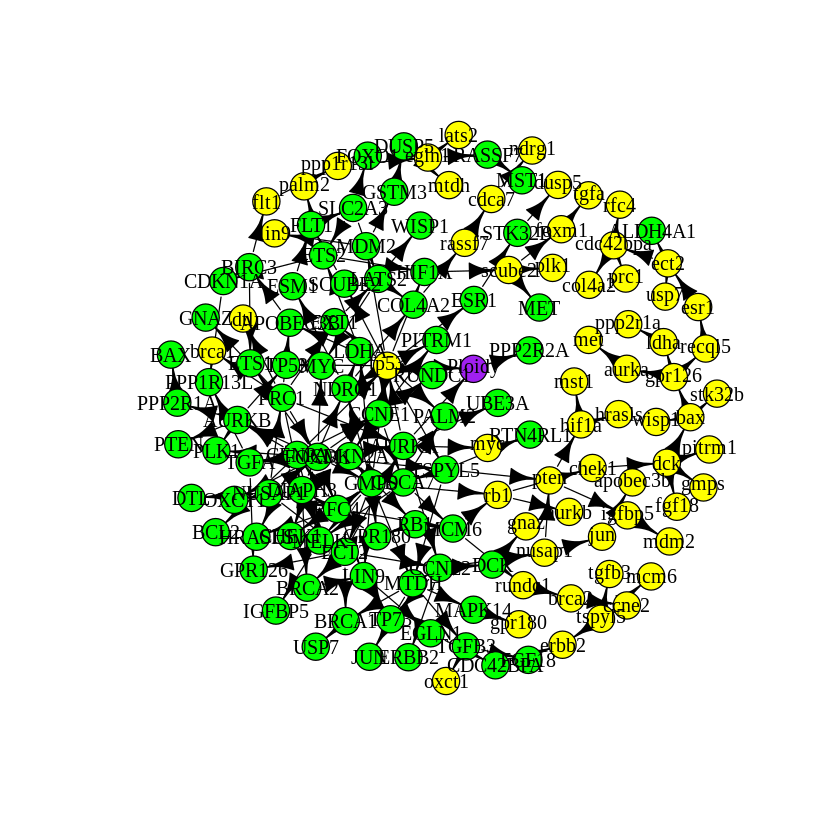

In [ ]:
# Convert the hill-climbing network to an igraph object and plot the result. 
cosmicCancer_hc_adj = amat(cosmicCancer_hc)
cosmicCancer_hc_net = igraph::graph_from_adjacency_matrix(cosmicCancer_hc_adj)

# Some variables can have 0 degree. Do not display these variables. 
NoDegree=which(igraph::degree(cosmicCancer_hc_net)==0)
cosmicCancer_hc_net_noIsolated=delete.vertices(cosmicCancer_hc_net ,NoDegree)
e <- get.edgelist(cosmicCancer_hc_net_noIsolated,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cosmicCancer_hc_net_noIsolated), area=8*(vcount(cosmicCancer_hc_net_noIsolated)^2),repulse.rad=(vcount(cosmicCancer_hc_net_noIsolated)^3.1))

plot( cosmicCancer_hc_net_noIsolated, 
      layout=l,
      size=20,
      vertex.size=10,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(cosmicCancer_hc_net_noIsolated)$name==toupper(V(cosmicCancer_hc_net_noIsolated)$name), 'green', 
      (ifelse(V(cosmicCancer_hc_net_noIsolated)$name==tolower(V(cosmicCancer_hc_net_noIsolated)$name), 'yellow','purple'))))


*   Le noeud violet représente la variable "ploidy"
*   Les genes mutants sont en jaune.
*   les genes sur/sous exprimés sont en vert.


## **Question 5**

In [ ]:
cosmicCancer_hc=cosmicCancer_hc_net_noIsolated
edges = as.array(attr(E(cosmicCancer_hc), "vnames"))
edges_directed=matrix(unlist(strsplit(edges, "[|]")), ncol = 2, byrow = TRUE)

In [ ]:
# Idendify the mutated genes (lower case nodes) that are significantly related to gene expression (upper case nodes). 

sens1 = edges_directed[,1]==toupper(edges_directed[,1]) & edges_directed[,2]==tolower(edges_directed)[,2]
sens2 = edges_directed[,2]==toupper(edges_directed[,2]) & edges_directed[,1]==tolower(edges_directed)[,1]
all_significant_links = sens1 | sens2
all_significant_nodes <- unique(c(edges_directed[all_significant_links]))

mutation_significant_nodes <- all_significant_nodes[all_significant_nodes == tolower(all_significant_nodes)]
print("Les genes mutants qui sont relatifs aux genes d'expression sont:")
mutation_significant_nodes

[1] "Les genes mutants qui sont relatifs aux genes d'expression sont:"


[1] "egln1"  "scube2" "ect2"   "tp53"   "oxct1"  "dusp5"  "gnaz"   "nusap1"
 [9] "rundc1" "rb1"    "pten"   "dtl"    "brca1"  "rassf7" "erbb2"  "gpr180"
[17] "myc"    "mtdh"   "flt1"   "palm2"  "lin9"

In [ ]:
# Identify also the variables related to the ’Ploidy’ property. 

ploidy_links = (edges_directed[,1]=="Ploidy") | (edges_directed[,2]=="Ploidy")
ploidy_nodes = unique(c(edges_directed[ploidy_links]))
ploidy_nodes = ploidy_nodes[ ploidy_nodes != "Ploidy"]
print("Les variables relatives au Ploidy sont:")
ploidy_nodes

[1] "Les variables relatives au Ploidy sont:"


[1] "tp53"    "AURKA"   "PPP2R2A"

In [ ]:
# On which nodes are centered the hubs?

degree_nodes=igraph::degree(cosmicCancer_hc)
hub_nodes=names(sort(degree_nodes, decreasing=TRUE))[0:10]
print("Les hubs sont:")
hub_nodes

[1] "Les hubs sont:"


[1] "tp53"  "FOXM1" "GMPS"  "CENPA" "PRC1"  "AURKA" "MTDH"  "CCNE2" "ECT2" 
[10] "CCNE1"

In [ ]:
# Get top 10 nodes in terms of betweenness centrality measure.
topNodes = as.data.frame(betweenness(
  cosmicCancer_hc,
  v = V(cosmicCancer_hc),
  directed = TRUE,
  weights = NULL
))

colnames(topNodes) <- c('betweenness')
topNodes$name <- rownames(topNodes)

topNodes[order(topNodes$betweenness, decreasing = T),][0:10,]

,betweenness,name
,<dbl>,<chr>
tp53,424.1667,tp53
MCM6,332.0000,MCM6
dck,300.0000,dck
rb1,299.0000,rb1
chek1,294.0000,chek1
bax,256.0000,bax
CDCA7,252.7333,CDCA7
NDRG1,240.0000,NDRG1
DIAPH3,232.0000,DIAPH3


In [ ]:
# Get top 10 edges in terms of betweenness centrality measure.

topEdges = as.data.frame(edge_betweenness(
  cosmicCancer_hc,
  e = E(cosmicCancer_hc),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('betweenness')
topEdges$name <- rownames(topEdges)

top10Edges = topEdges[order(topEdges$betweenness, decreasing = T),][0:10,]
top10Edges

,betweenness,name
,<dbl>,<chr>
50,315.0,50
47,308.0,47
122,300.5,122
12,272.0,12
61,238.0,61
125,235.0,125
173,230.5,173
98,212.0,98
146,209.0,146


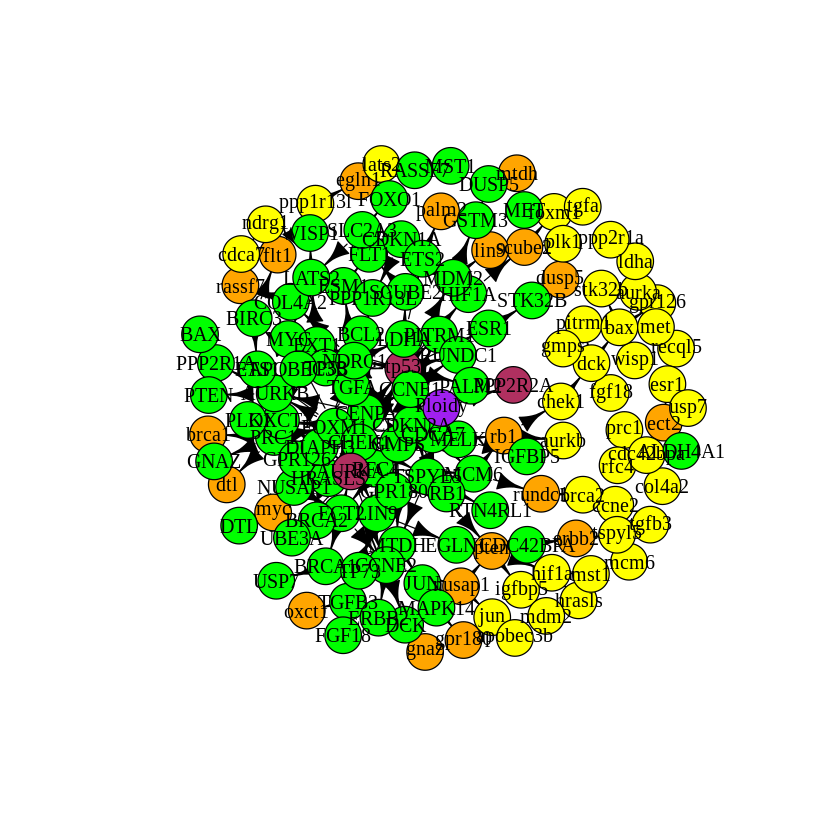

In [ ]:
V(cosmicCancer_hc)$color <- ifelse(V(cosmicCancer_hc) %in% V(cosmicCancer_hc)[ploidy_nodes], "maroon",
                            ifelse(V(cosmicCancer_hc) %in% V(cosmicCancer_hc)[mutation_significant_nodes], "orange",
                            ifelse(names(V(cosmicCancer_hc)) == tolower(names(V(cosmicCancer_hc))), "yellow",
                            ifelse(names(V(cosmicCancer_hc)) == toupper(names(V(cosmicCancer_hc))), "green", "purple"))))

e <- get.edgelist(cosmicCancer_hc,names=F)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cosmicCancer_hc),
                                       area=4*(vcount(cosmicCancer_hc)^2),repulse.rad=(vcount(cosmicCancer_hc)^3.1))

plot(cosmicCancer_hc,layout=l,size=7,
     vertex.label.color ='black',
     margin = 0.1,
     edge.color = 'black',
     width=40,
     height=60)


*   Les genes mutants sont en jaune.
*   Les genes d'expression sont en vert.
*   Le Ploidy est en violet.
*   Les genes mutants qui sont relatifs aux genes d'expression sont en orange.
*   Les variables relatives au Ploidy sont en marron.




# **Partie 2**

## **Question 1**

In [ ]:
# From the package miic, load the cosmicCancer data using the function 'data()'. 
# Explore the dataset content, variables and dimensions.
data("cosmicCancer")
head(cosmicCancer)

,bbc3,egln1,tgfb3,esm1,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
2,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
3,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
4,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
5,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
6,n,n,n,n,n,n,n,n,n,n,⋯,under,normal,normal,normal,over,normal,normal,normal,normal,2


In [ ]:
dim(cosmicCancer)

[1] 807 176

In [ ]:
summary(cosmicCancer)

 bbc3    egln1   tgfb3   esm1    igfbp5  fgf18   scube2  wisp1   flt1   
 n:806   n:804   n:804   n:807   n:805   n:802   n:800   n:801   n:799  
 y:  1   y:  3   y:  3           y:  2   y:  5   y:  7   y:  6   y:  8  
                                                                        
 hrasls  stk32b  rassf7  dck     melk    ext1    gnaz    ebf4    mtdh   
 n:806   n:802   n:806   n:805   n:802   n:800   n:801   n:807   n:806  
 y:  1   y:  5   y:  1   y:  2   y:  5   y:  7   y:  6           y:  1  
                                                                        
 pitrm1  qscn6l1 ccne2   ect2    cenpa   lin9    kntc2   mcm6    nusap1 
 n:798   n:807   n:802   n:801   n:807   n:802   n:807   n:801   n:803  
 y:  9           y:  5   y:  6           y:  5           y:  6   y:  4  
                                                                        
 orc6l   tspyl5  rundc1  prc1    rfc4    recql5  cdca7   dtl     col4a2 
 n:807   n:805   n:803   n:803   n:802   n:798   n:

## **Question 2**

In [ ]:
# Call the PC approach from the pcalg package and identify the issues related to the observational data if any. 
# Propose a way to resolve them.
# NB: Follow the example given in the documentation to call PC. Use the 'disc' independence test.
cosmicCancer_data = data.matrix(cosmicCancer)
cosmicCancer_data = cosmicCancer_data-1

n_lev = rep(-1, ncol(cosmicCancer_data))
for(iCol in 1:length(n_lev)){
  n_lev[iCol] = length(unique(cosmicCancer_data[,iCol]))
}
suffStat <- list(dm = cosmicCancer_data, nlev = n_lev, adaptDF = FALSE)
pc.cosmicCancer <- pc(suffStat, indepTest = disCItest,
                   p = ncol(cosmicCancer_data), alpha = 0.01,
                   verbose = TRUE)

Order=0; remaining edges:30800


ERROR: ignored

In [ ]:
sum(is.na(cosmicCancer))

[1] 8

Il manque 8 valeurs dans notre jeu de données. 

Pour résoudre ce problème, on pourra supprimer les observations qui sont concernées.

## **Question 3**

In [ ]:
# Remove the samples for which at least one variable has a NA value. Use the function complete.cases() to perform this action. 
# What proportion of the dataset did you remove? What are the concerned variables? Call again the PC approach.
# What are the concerned variables?

na_rows = cosmicCancer[!complete.cases(cosmicCancer),]
na_idx = as.integer(rownames(na_rows))

cosmicCancer_noNA = cosmicCancer[-na_idx,]
dim(cosmicCancer_noNA)

[1] 799 176

Nous avons supprimé 8 samples qui se situent aux indexes: [90 - 91 - 252 - 333 - 419 - 540 - 700 - 742].  


In [ ]:
# NB: The 'Ploidy' variable may be interpreted as 'integer'. If necessary, convert this column into factor type. 

cosmicCancer_noNA[, "Ploidy"] = as.factor(cosmicCancer_noNA[, "Ploidy"])

In [ ]:
# Furthermore, the variables should have at least 2 levels. Remove the column with constant variable.

const_col = c()
for(iCol in c(1:ncol(cosmicCancer_noNA))){ 
  if(length(unique(as.character(cosmicCancer_noNA[, iCol]))) < 2){
    const_col = c(const_col, iCol) }}

cosmicCancer_noNACst = cosmicCancer_noNA[, -const_col]

In [ ]:
# Call again the PC approach.

cosmicCancer_data = data.matrix(cosmicCancer_noNACst)
cosmicCancer_data = cosmicCancer_data-1

n_lev = rep(-1, ncol(cosmicCancer_data))
for(iCol in 1:length(n_lev)){
  n_lev[iCol] = length(unique(cosmicCancer_data[,iCol]))
}
suffStat <- list(dm = cosmicCancer_data, nlev = n_lev, adaptDF = FALSE)
pc.cosmicCancer <- pc(suffStat, indepTest = disCItest,
                   p = ncol(cosmicCancer_data), alpha = 0.01,
                   verbose = TRUE)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dim(cosmicCancer_noNACst)

[1] 799 162

In [ ]:
pc.cosmicCancer

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = disCItest, alpha = 0.01, 
    p = ncol(cosmicCancer_data), verbose = TRUE)
Number of undirected edges:  12 
Number of directed edges:    45 
Total number of edges:       57 

Le réseau Bayésien contient **57** **arcs**.



## **Question 4**

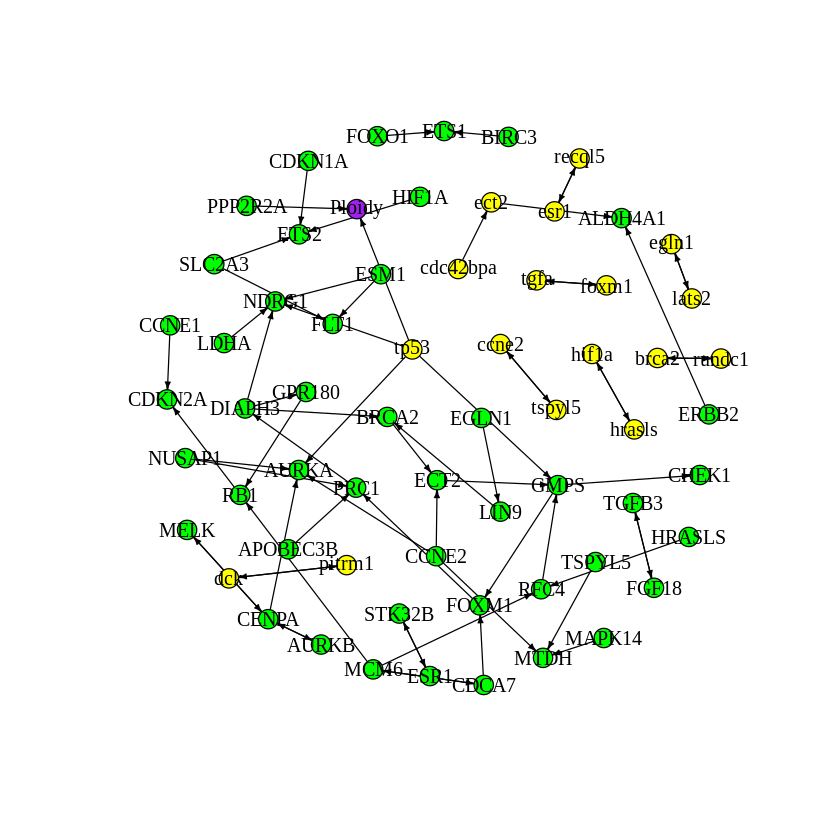

In [ ]:
# Convert the PC network to a bn object then to an igraph object.
pc.cosmicCancer_data_bn = bnlearn::as.bn(pc.cosmicCancer, check.cycles = FALSE)
pc.cosmicCancer_data_bn_adj = bnlearn::amat(pc.cosmicCancer_data_bn)
colnames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
rownames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
cosmicCancer_pc_net = igraph::graph_from_adjacency_matrix(pc.cosmicCancer_data_bn_adj)

# Some variables can have 0 degree. Do not display these variables. 
NoDegree=which(igraph::degree(cosmicCancer_pc_net)==0)
cosmicCancer_pc_net_noIsolated=delete.vertices(cosmicCancer_pc_net ,NoDegree)

# The graph can be dense. Consider using the function qgraph.layout.fruchtermanreingold from the qgraph package3
e <- igraph::get.edgelist(cosmicCancer_pc_net_noIsolated, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cosmicCancer_pc_net_noIsolated),
                                       area=20*(igraph::vcount(cosmicCancer_pc_net_noIsolated)^2),
                                       repulse.rad=(igraph::vcount(cosmicCancer_pc_net_noIsolated)^3.0))


plot(cosmicCancer_pc_net_noIsolated, edge.arrow.size = .3,
      layout=l,
      size=20,
      vertex.size=7,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(cosmicCancer_pc_net_noIsolated)$name==toupper(V(cosmicCancer_pc_net_noIsolated)$name), 'green', 
      (ifelse(V(cosmicCancer_pc_net_noIsolated)$name==tolower(V(cosmicCancer_pc_net_noIsolated)$name), 'yellow','purple')))
  )

## **Question 5**

In [ ]:
# 5. Produce several graphs at different signicance levels.
cosmicCancer_data = data.matrix(cosmicCancer_noNACst)
cosmicCancer_data = cosmicCancer_data-1

n_lev = rep(-1, ncol(cosmicCancer_data))
for(iCol in 1:length(n_lev)){
  n_lev[iCol] = length(unique(cosmicCancer_data[,iCol]))
}
suffStat <- list(dm = cosmicCancer_data, nlev = n_lev, adaptDF = FALSE)

# graph with alpha = 0.001
pc.cosmicCancer1 <- pc(suffStat, indepTest = disCItest,
                   p = ncol(cosmicCancer_data), alpha = 0.001,
                   verbose = TRUE)

# graph with alpha = 0.0001
pc.cosmicCancer2 <- pc(suffStat, indepTest = disCItest,
                   p = ncol(cosmicCancer_data), alpha = 0.0001,
                   verbose = TRUE)

# graph with alpha = 0.00001
pc.cosmicCancer3 <- pc(suffStat, indepTest = disCItest,
                   p = ncol(cosmicCancer_data), alpha = 0.00001,
                   verbose = TRUE)           

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = disCItest, alpha = 0.001, 
    p = ncol(cosmicCancer_data), verbose = TRUE)
Number of undirected edges:  12 
Number of directed edges:    21 
Total number of edges:       33 

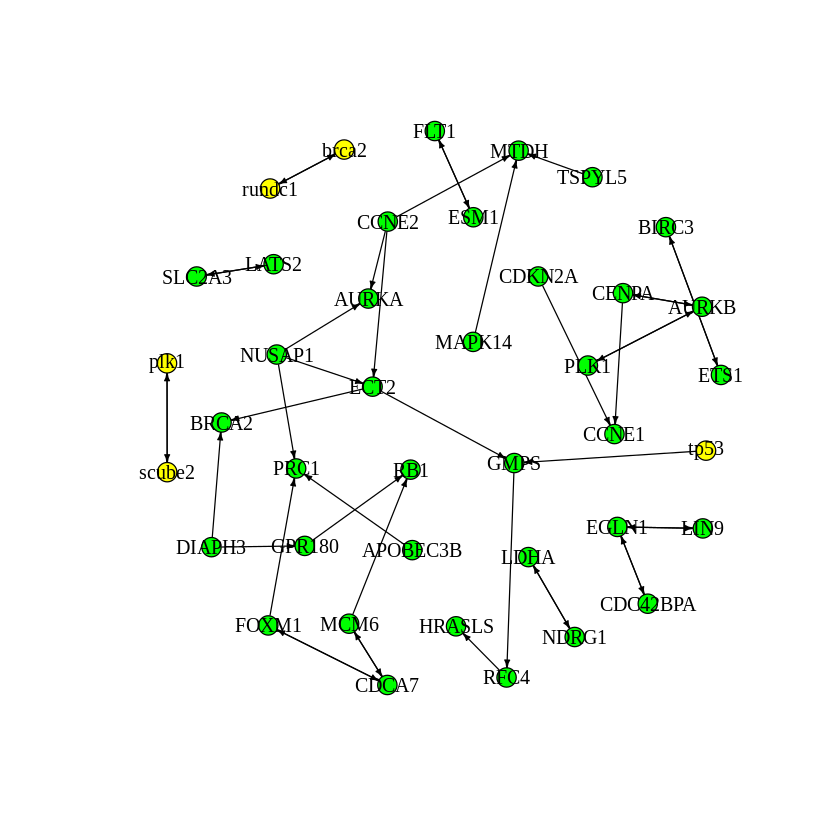

In [ ]:
pc.cosmicCancer1

pc.cosmicCancer_data_bn = bnlearn::as.bn(pc.cosmicCancer1, check.cycles = FALSE)
pc.cosmicCancer_data_bn_adj = bnlearn::amat(pc.cosmicCancer_data_bn)
colnames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
rownames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
cosmicCancer_pc_net = igraph::graph_from_adjacency_matrix(pc.cosmicCancer_data_bn_adj)
NoDegree=which(igraph::degree(cosmicCancer_pc_net)==0)
cosmicCancer_pc_net_noIsolated=delete.vertices(cosmicCancer_pc_net ,NoDegree)
e <- igraph::get.edgelist(cosmicCancer_pc_net_noIsolated, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cosmicCancer_pc_net_noIsolated),
                                       area=20*(igraph::vcount(cosmicCancer_pc_net_noIsolated)^2),
                                       repulse.rad=(igraph::vcount(cosmicCancer_pc_net_noIsolated)^3.0))

plot(cosmicCancer_pc_net_noIsolated, edge.arrow.size = .3,
      layout=l,
      size=20,
      vertex.size=7,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(cosmicCancer_pc_net_noIsolated)$name==toupper(V(cosmicCancer_pc_net_noIsolated)$name), 'green', 
      (ifelse(V(cosmicCancer_pc_net_noIsolated)$name==tolower(V(cosmicCancer_pc_net_noIsolated)$name), 'yellow','purple')))
  )

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = disCItest, alpha = 1e-04, 
    p = ncol(cosmicCancer_data), verbose = TRUE)
Number of undirected edges:  12 
Number of directed edges:    17 
Total number of edges:       29 

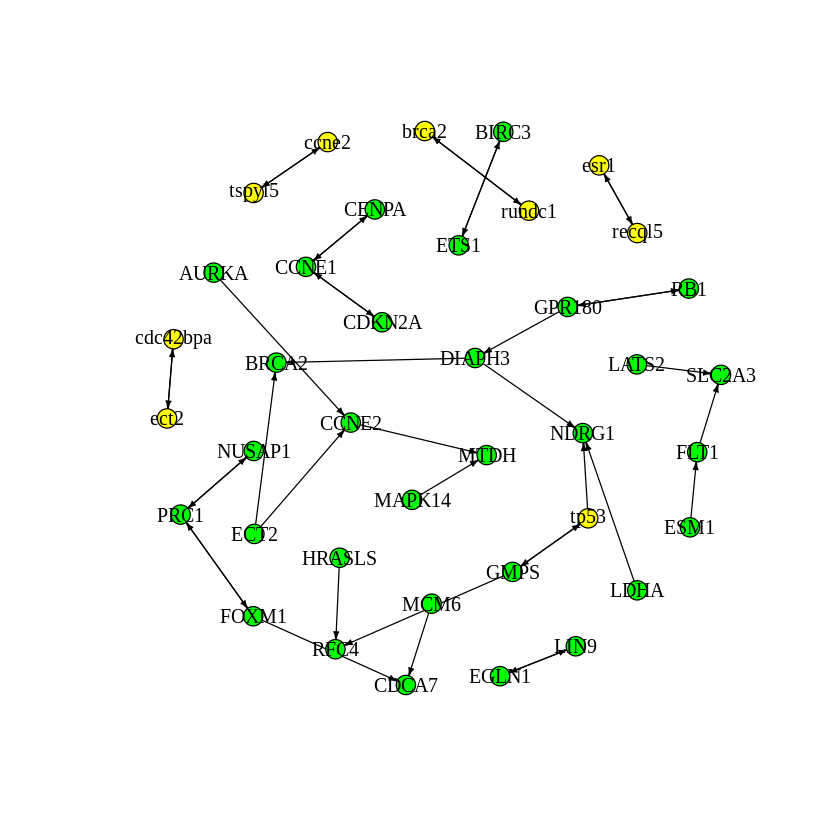

In [ ]:
pc.cosmicCancer2

pc.cosmicCancer_data_bn = bnlearn::as.bn(pc.cosmicCancer2, check.cycles = FALSE)
pc.cosmicCancer_data_bn_adj = bnlearn::amat(pc.cosmicCancer_data_bn)
colnames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
rownames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
cosmicCancer_pc_net = igraph::graph_from_adjacency_matrix(pc.cosmicCancer_data_bn_adj)
NoDegree=which(igraph::degree(cosmicCancer_pc_net)==0)
cosmicCancer_pc_net_noIsolated=delete.vertices(cosmicCancer_pc_net ,NoDegree)
e <- igraph::get.edgelist(cosmicCancer_pc_net_noIsolated, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cosmicCancer_pc_net_noIsolated),
                                       area=20*(igraph::vcount(cosmicCancer_pc_net_noIsolated)^2),
                                       repulse.rad=(igraph::vcount(cosmicCancer_pc_net_noIsolated)^3.0))

plot(cosmicCancer_pc_net_noIsolated, edge.arrow.size = .3,
      layout=l,
      size=20,
      vertex.size=7,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(cosmicCancer_pc_net_noIsolated)$name==toupper(V(cosmicCancer_pc_net_noIsolated)$name), 'green', 
      (ifelse(V(cosmicCancer_pc_net_noIsolated)$name==tolower(V(cosmicCancer_pc_net_noIsolated)$name), 'yellow','purple')))
  )

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = disCItest, alpha = 1e-05, 
    p = ncol(cosmicCancer_data), verbose = TRUE)
Number of undirected edges:  12 
Number of directed edges:    8 
Total number of edges:       20 

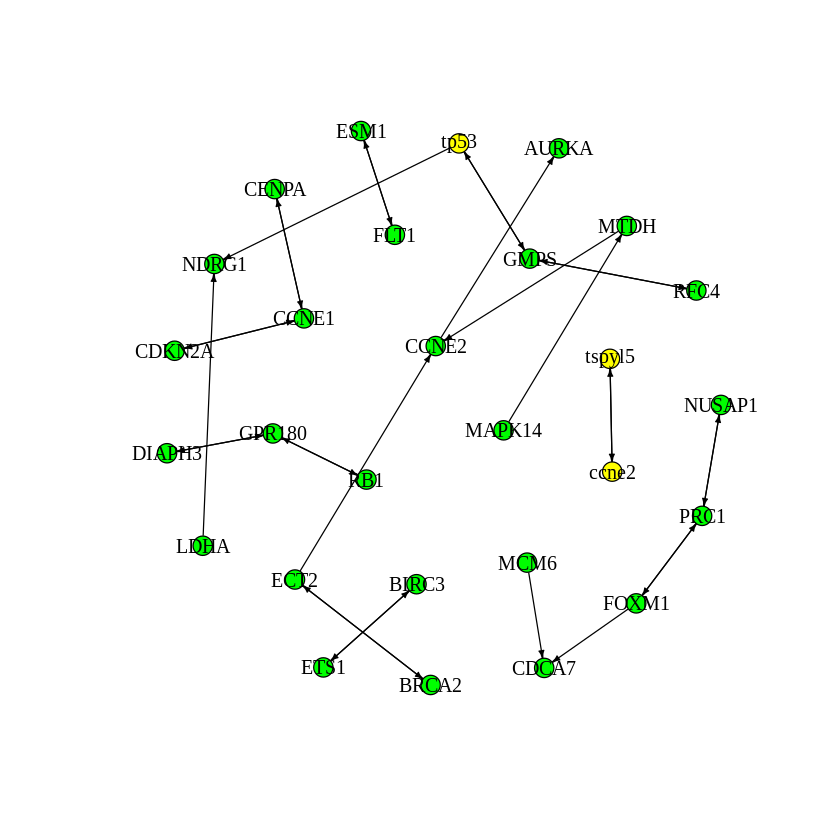

In [ ]:
pc.cosmicCancer3

pc.cosmicCancer_data_bn = bnlearn::as.bn(pc.cosmicCancer3, check.cycles = FALSE)
pc.cosmicCancer_data_bn_adj = bnlearn::amat(pc.cosmicCancer_data_bn)
colnames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
rownames(pc.cosmicCancer_data_bn_adj) = colnames(cosmicCancer_data)
cosmicCancer_pc_net = igraph::graph_from_adjacency_matrix(pc.cosmicCancer_data_bn_adj)
NoDegree=which(igraph::degree(cosmicCancer_pc_net)==0)
cosmicCancer_pc_net_noIsolated=delete.vertices(cosmicCancer_pc_net ,NoDegree)
e <- igraph::get.edgelist(cosmicCancer_pc_net_noIsolated, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cosmicCancer_pc_net_noIsolated),
                                       area=20*(igraph::vcount(cosmicCancer_pc_net_noIsolated)^2),
                                       repulse.rad=(igraph::vcount(cosmicCancer_pc_net_noIsolated)^3.0))

plot(cosmicCancer_pc_net_noIsolated, edge.arrow.size = .3,
      layout=l,
      size=20,
      vertex.size=7,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(cosmicCancer_pc_net_noIsolated)$name==toupper(V(cosmicCancer_pc_net_noIsolated)$name), 'green', 
      (ifelse(V(cosmicCancer_pc_net_noIsolated)$name==tolower(V(cosmicCancer_pc_net_noIsolated)$name), 'yellow','purple')))
  )

En diminuant le significance level, le nombre de liens entre les variables a diminué. Ploidy a également disparu du graphe.

## **Question 6**

In [ ]:
cosmicCancer_pc=cosmicCancer_pc_net_noIsolated
edges = as.array(attr(E(cosmicCancer_pc), "vnames"))
edges_directed=matrix(unlist(strsplit(edges, "[|]")), ncol = 2, byrow = TRUE)

In [ ]:
# Idendify the mutated genes (lower case nodes) that are significantly related to gene expression (upper case nodes). 

sens1 = edges_directed[,1]==toupper(edges_directed[,1]) & edges_directed[,2]==tolower(edges_directed)[,2]
sens2 = edges_directed[,2]==toupper(edges_directed[,2]) & edges_directed[,1]==tolower(edges_directed)[,1]
all_significant_links = sens1 | sens2
all_significant_nodes <- unique(c(edges_directed[all_significant_links]))

mutation_significant_nodes <- all_significant_nodes[all_significant_nodes == tolower(all_significant_nodes)]
print("Les genes mutants qui sont relatifs aux genes d'expression sont:")
mutation_significant_nodes

[1] "Les genes mutants qui sont relatifs aux genes d'expression sont:"


[1] "ect2" "tp53"

In [ ]:
# Identify also the variables related to the ’Ploidy’ property. 

ploidy_links = (edges_directed[,1]=="Ploidy") | (edges_directed[,2]=="Ploidy")
ploidy_nodes = unique(c(edges_directed[ploidy_links]))
ploidy_nodes = ploidy_nodes[ ploidy_nodes != "Ploidy"]
print("Les variables qui sont relatifs à la propriété Ploidy sont:")
ploidy_nodes

[1] "Les variables qui sont relatifs à la propriété Ploidy sont:"


[1] "tp53"    "PPP2R2A"

In [ ]:
# On which nodes are centered the hubs?

degree_nodes=igraph::degree(cosmicCancer_pc)
hub_nodes=names(sort(degree_nodes, decreasing=TRUE))[0:10]
hub_nodes

[1] "CENPA"  "GMPS"   "tp53"   "MCM6"   "PRC1"   "DIAPH3" "AURKA"  "NDRG1" 
 [9] "MTDH"   "CCNE2"

In [ ]:
# Get top 10 nodes in terms of betweenness centrality measure.
topNodes = as.data.frame(betweenness(
  cosmicCancer_pc,
  v = V(cosmicCancer_pc),
  directed = TRUE,
  weights = NULL
))

colnames(topNodes) <- c('betweenness')
topNodes$name <- rownames(topNodes)

topNodes[order(topNodes$betweenness, decreasing = T),][0:10,]

,betweenness,name
,<dbl>,<chr>
PRC1,93,PRC1
DIAPH3,88,DIAPH3
GMPS,83,GMPS
FOXM1,76,FOXM1
ECT2,52,ECT2
BRCA2,46,BRCA2
GPR180,28,GPR180
RB1,17,RB1
RFC4,15,RFC4


In [ ]:
# Get top 10 edges in terms of betweenness centrality measure.

topEdges = as.data.frame(edge_betweenness(
  cosmicCancer_pc,
  e = E(cosmicCancer_pc),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('betweenness')
topEdges$name <- rownames(topEdges)

top10Edges = topEdges[order(topEdges$betweenness, decreasing = T),][0:10,]
top10Edges

,betweenness,name
,<dbl>,<chr>
43,103,43
58,86,58
51,77,51
32,62,32
61,56,61
48,44,48
49,39,49
47,30,47
44,26,44


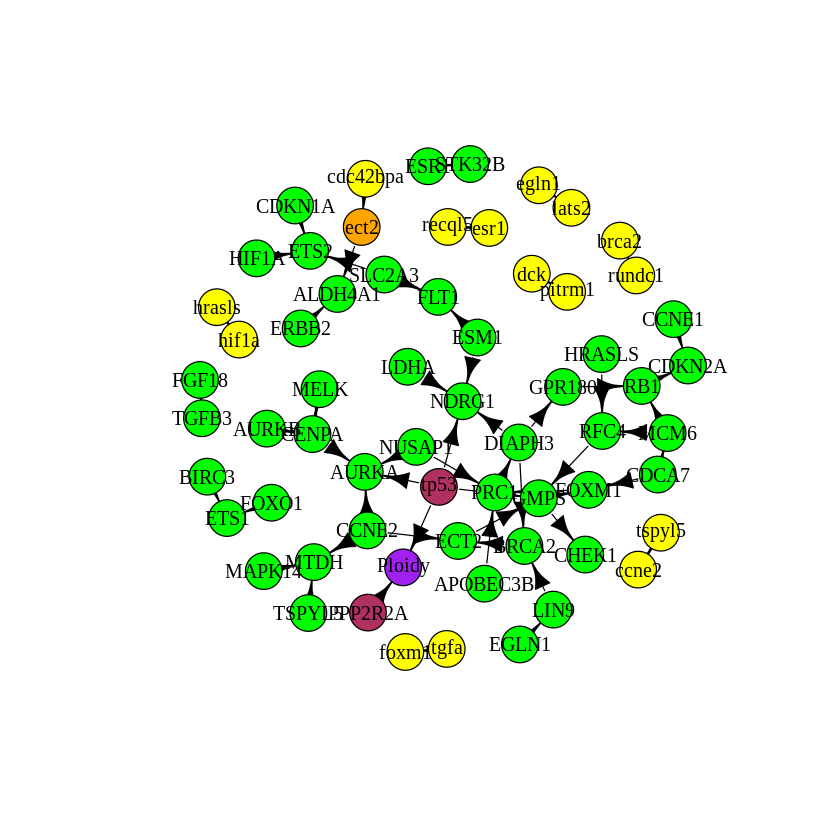

In [ ]:
V(cosmicCancer_pc)$color <- ifelse(V(cosmicCancer_pc) %in% V(cosmicCancer_pc)[ploidy_nodes], "maroon",
                            ifelse(V(cosmicCancer_pc) %in% V(cosmicCancer_pc)[mutation_significant_nodes], "orange",
                            ifelse(names(V(cosmicCancer_pc)) == tolower(names(V(cosmicCancer_pc))), "yellow",
                            ifelse(names(V(cosmicCancer_pc)) == toupper(names(V(cosmicCancer_pc))), "green", "purple"))))

e <- get.edgelist(cosmicCancer_pc,names=F)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cosmicCancer_pc),
                                       area=4*(vcount(cosmicCancer_pc)^2),repulse.rad=(vcount(cosmicCancer_pc)^3.1))

plot(cosmicCancer_pc,layout=l,size=7,
     vertex.label.color ='black',
     margin = 0.1,
     edge.color = 'black',
     width=40,
     height=60,
)


*   Les genes mutants sont en jaune.
*   Les genes d'expression sont en vert.
*   Le Ploidy est en violet.
*   Les genes mutants qui sont relatifs aux genes d'expression sont en orange.
*   Les variables relatives au Ploidy sont en marron.




# **Partie 3**

## **Question 1**

In [ ]:
?miic
data(cosmicCancer)

In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 1000, conf_threshold = 0.001
)
graph_miic <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...400 edges cut.
Search for edge directions...
Number of edges: 94


Nous avons construit un graphe avec 94 arêtes.

## **Question 2**

*   n_shuffles est le nombre de mélanges de l'ensemble de données d'origine afin d'évaluer le rapport de confiance spécifique aux arêtes de toutes les arêtes inférées.
*   conf_threshold est le seuil utilisé pour filtrer les arêtes les moins probables.



In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 100, conf_threshold = 0.001
)
graph_miic2 <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...400 edges cut.
Search for edge directions...
Number of edges: 94


In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 50, conf_threshold = 0.001
)
graph_miic5 <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...400 edges cut.
Search for edge directions...
Number of edges: 94


In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 1000, conf_threshold = 0.01
)
graph_miic3 <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...358 edges cut.
Search for edge directions...
Number of edges: 136


In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 50, conf_threshold = 0.1
)
graph_miic6 <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...242 edges cut.
Search for edge directions...
Number of edges: 252


In [ ]:
miic.res <- miic(
        input_data = cosmicCancer, state_order = cosmicCancer_stateOrder, latent = "yes",
        n_shuffles = 100, conf_threshold = 0.01
)
graph_miic4 <- miic.export(miic.res ,"igraph")

Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...358 edges cut.
Search for edge directions...
Number of edges: 136


Nous remarquons que faire varier le nombre de shuffles "n_shuffles" n'influence pas sur le nombre de noeuds. Contrairement à la configuration du seuil "conf_threshold" qui le determine, (comme expliqué précédemment il s'occupe de filtrer les arêtes selon un certain seuil).

## **Question 3**

In [ ]:
# Some variables can have 0 degree. Do not display these variables. 
NoDegree=which(igraph::degree(graph_miic)==0)
graph_miic_net_noIsolated=delete.vertices(graph_miic ,NoDegree)

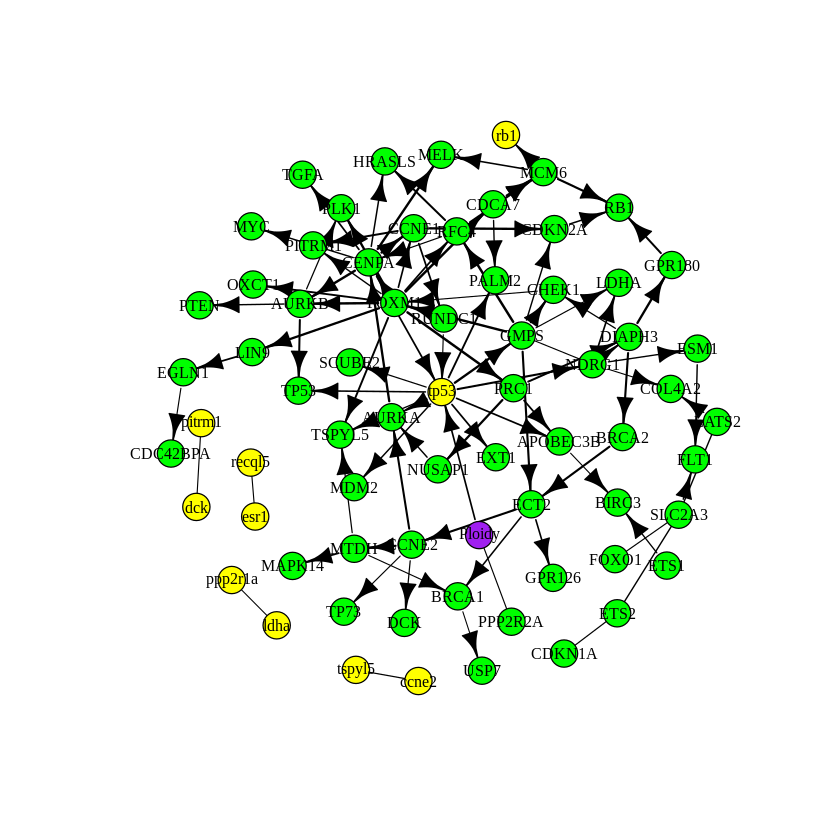

In [ ]:
e <- get.edgelist(graph_miic_net_noIsolated,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(graph_miic_net_noIsolated), area=8*(vcount(graph_miic_net_noIsolated)^2),repulse.rad=(vcount(graph_miic_net_noIsolated)^3.1))

plot( graph_miic_net_noIsolated, 
      layout=l,
      size=20,
      vertex.size=10,
      vertex.label.color='black', 
      edge.color = "black",
      # Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.  
      vertex.color = ifelse(V(graph_miic_net_noIsolated)$name==toupper(V(graph_miic_net_noIsolated)$name), 'green', 
      (ifelse(V(graph_miic_net_noIsolated)$name==tolower(V(graph_miic_net_noIsolated)$name), 'yellow','purple'))))




*   Le noeud violet représente la variable "ploidy"
*   Les genes mutants sont en jaune.
*   les genes sur/sous exprimés sont en vert.



## **Question 4**

In [ ]:
graph_miic=graph_miic_net_noIsolated
edges = as.array(attr(E(graph_miic), "vnames"))
edges_directed=matrix(unlist(strsplit(edges, "[|]")), ncol = 2, byrow = TRUE)

In [ ]:
# Idendify the mutated genes (lower case nodes) that are significantly related to gene expression (upper case nodes). 

sens1 = edges_directed[,1]==toupper(edges_directed[,1]) & edges_directed[,2]==tolower(edges_directed)[,2]
sens2 = edges_directed[,2]==toupper(edges_directed[,2]) & edges_directed[,1]==tolower(edges_directed)[,1]
all_significant_links = sens1 | sens2
all_significant_nodes <- unique(c(edges_directed[all_significant_links]))

mutation_significant_nodes <- all_significant_nodes[all_significant_nodes == tolower(all_significant_nodes)]
print("Les genes mutants qui sont relatifs aux genes d'expression sont:")
mutation_significant_nodes

[1] "Les genes mutants qui sont relatifs aux genes d'expression sont:"


[1] "tp53" "rb1"

In [ ]:
# Identify also the variables related to the ’Ploidy’ property. 

ploidy_links = (edges_directed[,1]=="Ploidy") | (edges_directed[,2]=="Ploidy")
ploidy_nodes = unique(c(edges_directed[ploidy_links]))
ploidy_nodes = ploidy_nodes[ ploidy_nodes != "Ploidy"]
print("Les variables qui relatives au Ploidy sont:")
ploidy_nodes

[1] "Les variables qui relatives au Ploidy sont:"


[1] "tp53"    "PPP2R2A"

In [ ]:
# On which nodes are centered the hubs?

degree_nodes=igraph::degree(graph_miic)
hub_nodes=names(sort(degree_nodes, decreasing=TRUE))[0:10]
print("Les hubs sont:")
hub_nodes

[1] "Les hubs sont:"


[1] "FOXM1"  "tp53"   "CENPA"  "GMPS"   "NDRG1"  "CCNE1"  "DIAPH3" "RFC4"  
 [9] "MCM6"   "CCNE2"

In [ ]:
# Get top 10 nodes in terms of betweenness centrality measure.
topNodes = as.data.frame(betweenness(
  graph_miic,
  v = V(graph_miic),
  directed = TRUE,
  weights = NULL
))

colnames(topNodes) <- c('betweenness')
topNodes$name <- rownames(topNodes)

topNodes[order(topNodes$betweenness, decreasing = T),][0:10,]

,betweenness,name
,<dbl>,<chr>
tp53,435.33333,tp53
CENPA,375.33333,CENPA
FOXM1,245.66667,FOXM1
GMPS,240.00000,GMPS
AURKA,221.16667,AURKA
ECT2,167.00000,ECT2
CCNE2,154.00000,CCNE2
DIAPH3,112.33333,DIAPH3
NDRG1,90.50000,NDRG1


In [ ]:
# Get top 10 edges in terms of betweenness centrality measure.

topEdges = as.data.frame(edge_betweenness(
  graph_miic,
  e = E(graph_miic),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('betweenness')
topEdges$name <- rownames(topEdges)

top10Edges = topEdges[order(topEdges$betweenness, decreasing = T),][0:10,]
top10Edges

,betweenness,name
,<dbl>,<chr>
37,298.3333,37
12,273.1667,12
13,256.0000,13
23,170.0000,23
86,138.3333,86
26,133.0000,26
7,123.3333,7
87,100.0000,87
25,99.5000,25
